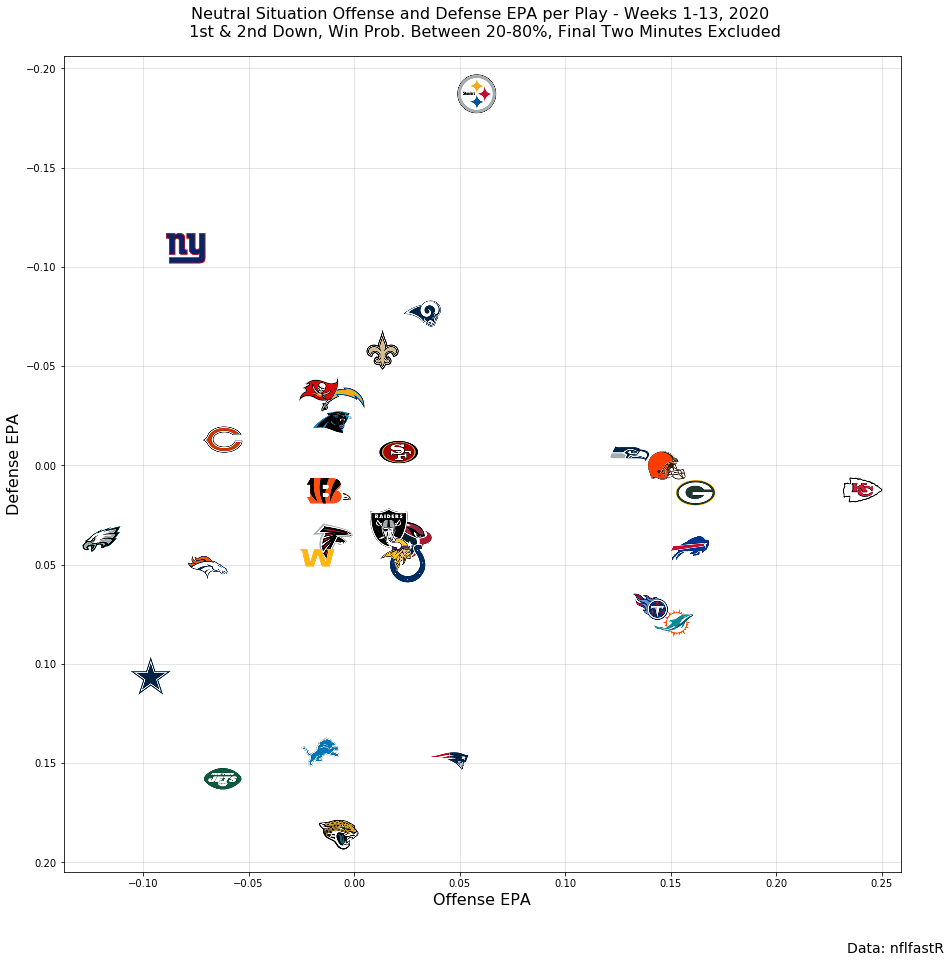

In [8]:
import pandas as pd
import numpy as np
YEAR = 2020
filePath = '/Users/Firefly/Desktop/_iMac_Drive/Joseph/Coding/NFL/Jupyter/'

# Choose whether you want the 'raw_play_by_play' or 'cleaned_play_by_play' data 
#file = 'raw_play_by_play_'
file = 'cleaned_play_by_play_'

# Import data
data = pd.read_csv(filePath + file + str(YEAR) + '.csv.gz', compression='gzip', low_memory=False)

# These two lines set the scroll options so you can scroll vertically and horizontally.
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

# assign week as a variable that returns the lastest week
minWeek = data['week'].min()
maxWeek = data['week'].max()

data = data.loc[data.season_type=='REG']

# Create dataframe of just plays in neutral situations
neutral_situation = data.loc[(data.down<5) & (data.half_seconds_remaining>0) &
                             (data.wp>=.2) & (data.wp<=.8)]

#Filter for offense epa
offense_epa = neutral_situation.groupby('posteam')[['epa']].mean()

#Filter for defense epa
defense_epa = neutral_situation.groupby('defteam')[['epa']].mean()

import os
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Add logos to the dataframe
def getImage(filePath): 
    return OffsetImage(plt.imread(filePath), zoom=.5)

logos = os.listdir(filePath + 'team_logos')
if '.DS_Store' in logos:
    logos.remove('.DS_Store')

logo_paths = []

for i in logos:
    logo_paths.append(filePath + 'team_logos/' + str(i))
logo_paths.sort()

#Define x (horizontal) and y (vertical) axis
x = offense_epa.epa
y = defense_epa.epa

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(15,15))

#Make a scatter plot first to get the points to place logos
ax.scatter(x, y, s=.001)

# Invert Y axis so that top right is best, as god intended
ax.invert_yaxis()

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
#Adding labels and text
ax.set_xlabel('Offense EPA', fontsize=16)
ax.set_ylabel('Defense EPA', fontsize=16)
ax.set_title('Neutral Situation Offense and Defense EPA per Play - Weeks ' + str(minWeek) + '-' + str(maxWeek) + ', ' + str(YEAR) + ' \n 1st & 2nd Down, Win Prob. Between 20-80%, Final Two Minutes Excluded', 
             fontsize=16,pad=20)

plt.figtext(.85,.05,'Data: nflfastR',fontsize=14)

#Save the figure as a png
plt.savefig('team_epas.png', dpi=400)
